In [7]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import FileLink

In [9]:
df_age = pd.read_excel(r"C:\Users\Nares\OneDrive\Desktop\Mental Health Project\Age Wise Data.xlsx")

In [10]:
#remove spaces if any

In [11]:
df_age.columns = df_age.columns.str.strip().str.lower()

In [12]:
#identify column with agewise death Data

In [13]:
age_group_cols = [col for col in df_age.columns if "number of deaths" in col]

In [14]:
#reshape the data with melt ... from wide format to long format

In [15]:
df_long = df_age.melt(
    id_vars =["area code", "area of usual residence", "sex", "year of death registration"],
    value_vars=age_group_cols,
    var_name="age_group",
    value_name="suicides"
)

In [16]:
#clean the age group data

In [17]:
df_long["age_group"] = df_long["age_group"].str.replace("number of deaths", "", regex = False).str.strip()

In [18]:
#Analysing suicide counts by age group and gender

In [20]:
age_gender_summary = df_long.groupby(["age_group", "sex"])["suicides"]

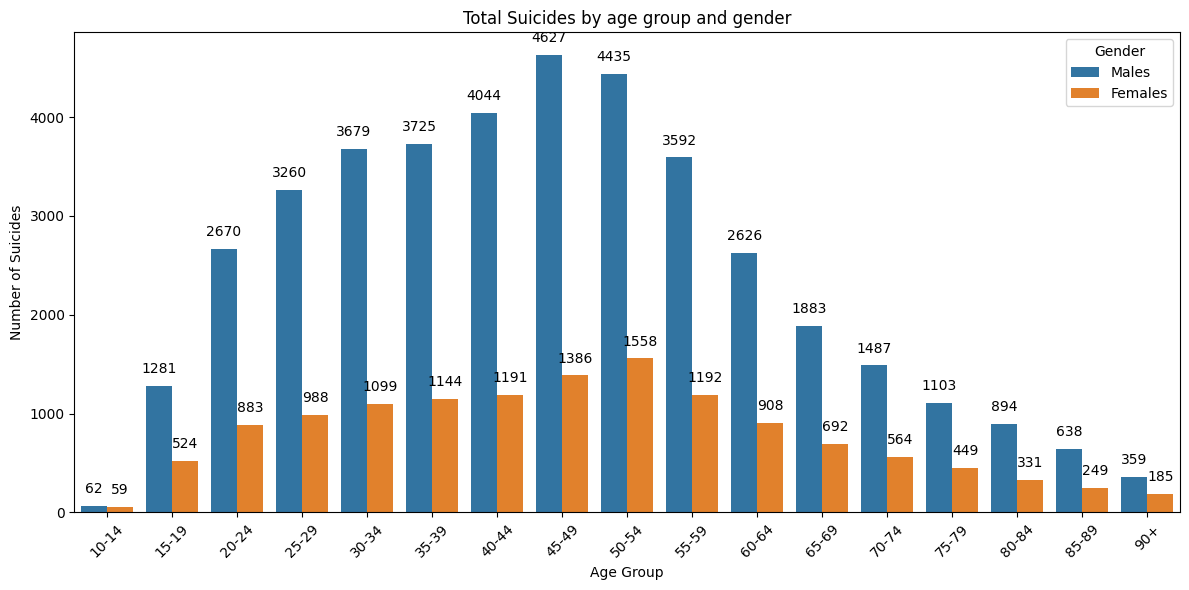

In [21]:
plt.figure(figsize=(12,6))
barplot = sns.barplot(data=df_long, x = "age_group", y = "suicides", hue = "sex", estimator = sum, errorbar = None)
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 100,
            s=int(height),
            ha='center',
            va='bottom'
        )
plt.title("Total Suicides by age group and gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Suicides")
plt.xticks(rotation = 45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [22]:
df_county = pd.read_excel(r"C:\Users\Nares\OneDrive\Desktop\Mental Health Project\County Wise Data.xlsx")

In [23]:
df_county.columns = (
    df_county.columns
    .str.replace(r'\n', ' ', regex=True)   
    .str.replace(r'\[.*\]', '', regex=True) 
    .str.strip()                           
    .str.lower()                           
)

In [24]:
df_county.columns = df_county.columns.str.strip().str.lower()

In [25]:
print(df_county.columns.tolist())

['area code', 'country or region', 'county or unitary authority', '2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014']


In [29]:
df_county_long = df_county.melt(
    id_vars=["county or unitary authority"],
    value_vars = [str(y) for y in range(2014,2024)],
    var_name = "year",
    value_name = "suicides",
)

In [30]:
df_total = df_county_long.groupby('county or unitary authority', as_index=False)['suicides'].sum()
df_total = df_total.sort_values(by='suicides', ascending=False)

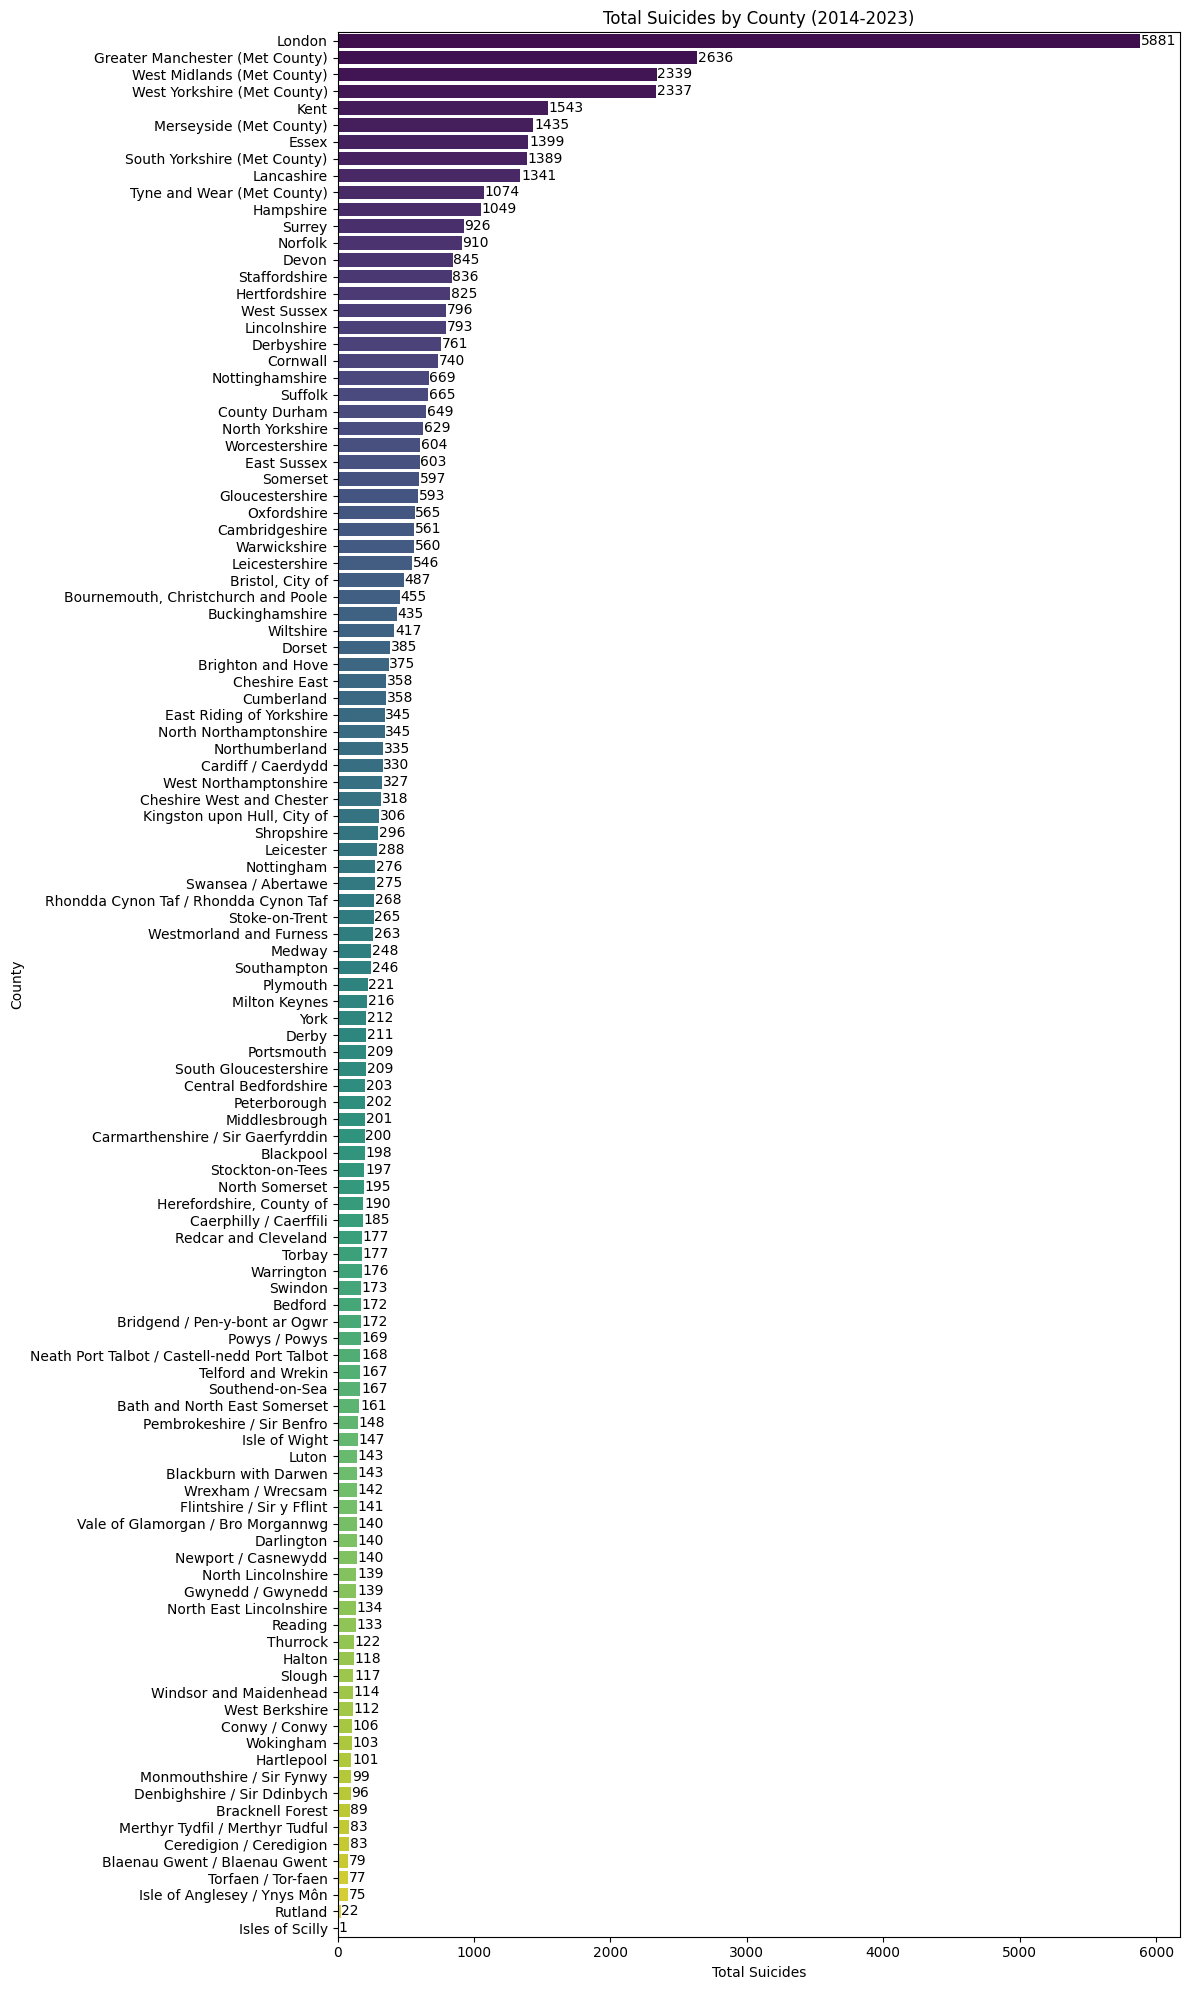

In [40]:
plt.figure(figsize=(12, 20))
barplot = sns.barplot(
    data=df_total.sort_values('suicides', ascending=False), 
    x="suicides",
    y="county or unitary authority",
    hue="county or unitary authority",
    palette="viridis"
)


for p in barplot.patches:
    width = p.get_width()
    y_pos = p.get_y() + p.get_height() / 2
    barplot.annotate(
        f"{int(width)}",
        (width + 5, y_pos),  
        ha="left",
        va="center"
    )

plt.title("Total Suicides by County (2014-2023)")
plt.xlabel("Total Suicides")
plt.ylabel("County")
plt.tight_layout()
plt.show()